In [2]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text


In [3]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

In [4]:
tile_url = get_tile_url("fixed", 2020, 2)
tile_url

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2020/quarter%3D2/2020-04-01_performance_fixed_tiles.zip'

In [5]:
tiles = gp.read_file(tile_url)


In [6]:
tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,1321222233020202,144116,125751,3,7330,1324,"POLYGON ((113.55469 22.16197, 113.56018 22.161..."
1,1230231303303002,89763,52939,42,726,137,"POLYGON ((55.41504 25.27947, 55.42053 25.27947..."
2,0313131210131030,62657,15479,19,271,40,"POLYGON ((-1.79077 51.55658, -1.78528 51.55658..."
3,0213330110110321,98061,11842,19,2,1,"POLYGON ((-93.22449 45.06576, -93.21899 45.065..."
4,3100130032202231,15167,7287,8,674,122,"POLYGON ((107.59460 -6.91552, 107.60010 -6.915..."
...,...,...,...,...,...,...,...
6938758,0322321110233131,3785,819,62,1,1,"POLYGON ((-73.65784 5.29883, -73.65234 5.29883..."
6938759,1221210131030020,12128,1647,21,1,1,"POLYGON ((30.67383 31.26916, 30.67932 31.26916..."
6938760,1203200302000101,21538,93508,15,1,1,"POLYGON ((23.93372 47.75410, 23.93921 47.75410..."
6938761,0322111222233310,4192,7993,139,1,1,"POLYGON ((-70.14771 19.33188, -70.14221 19.331..."


In [7]:
county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip" 
counties = gp.read_file(county_url)


In [8]:
il_counties = counties.loc[counties['STATEFP'] == '17'].to_crs(4326) 


In [9]:
il_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
85,17,067,00424235,17067,Hancock,Hancock County,06,H1,G4020,161,22800,None,A,2055798692,53563370,+40.4013180,-091.1688008,"POLYGON ((-91.37421 40.46399, -91.37385 40.464..."
92,17,025,00424214,17025,Clay,Clay County,06,H1,G4020,None,None,None,A,1212815740,3271820,+38.7468187,-088.4823254,"POLYGON ((-88.69517 38.82630, -88.69516 38.826..."
131,17,185,00424293,17185,Wabash,Wabash County,06,H1,G4020,None,None,None,A,578403998,10973558,+38.4458209,-087.8391674,"POLYGON ((-87.94460 38.44581, -87.94405 38.446..."
148,17,113,01784833,17113,McLean,McLean County,06,H1,G4020,145,14010,None,A,3064600918,7801224,+40.4945594,-088.8445391,"POLYGON ((-89.26650 40.48555, -89.26653 40.486..."
158,17,005,00424204,17005,Bond,Bond County,06,H1,G4020,476,41180,None,A,985073265,6462629,+38.8859240,-089.4365916,"POLYGON ((-89.36179 39.02772, -89.35987 39.027..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,17,111,01784815,17111,McHenry,McHenry County,06,H1,G4020,176,16980,16984,A,1562786765,19872668,+42.3242982,-088.4522450,"POLYGON ((-88.23789 42.49490, -88.23427 42.494..."
2922,17,015,00424209,17015,Carroll,Carroll County,06,H1,G4020,None,None,None,A,1153597403,55881824,+42.0709000,-089.9241894,"POLYGON ((-90.16133 42.10972, -90.16135 42.110..."
2987,17,047,00424225,17047,Edwards,Edwards County,06,H1,G4020,None,None,None,A,576012469,781202,+38.4170954,-088.0479408,"POLYGON ((-88.14813 38.44393, -88.14812 38.445..."
2996,17,071,00424237,17071,Henderson,Henderson County,06,H1,G4020,161,15460,None,A,981077355,42557372,+40.8144710,-090.9412464,"POLYGON ((-91.01390 40.89562, -91.01324 40.896..."


tiles_in_il_counties = gp.sjoin(tiles, il_counties, how="inner", op='intersects')


In [12]:
tiles_in_il_counties['avg_d_mbps'] = tiles_in_il_counties['avg_d_kbps'] / 1000
tiles_in_il_counties['avg_u_mbps'] = tiles_in_il_counties['avg_u_kbps'] / 1000

In [15]:
tiles_in_il_counties.to_csv('il_speed_tests.csv')

In [18]:
tiles_in_il_counties

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,STATEFP,COUNTYFP,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,avg_d_mbps,avg_u_mbps
30,0320000123102231,137686,10329,53,18,6,"POLYGON ((-88.04993 40.12009, -88.04443 40.120...",2621,17,019,...,None,16580,None,A,2579920046,6088510,+40.1389845,-088.1969749,137.686,10.329
15236,0320000122131330,65486,4272,21,15,2,"POLYGON ((-88.25317 40.08648, -88.24768 40.086...",2621,17,019,...,None,16580,None,A,2579920046,6088510,+40.1389845,-088.1969749,65.486,4.272
23571,0320000122100011,117400,113176,6,225,24,"POLYGON ((-88.40149 40.17887, -88.39600 40.178...",2621,17,019,...,None,16580,None,A,2579920046,6088510,+40.1389845,-088.1969749,117.400,113.176
23954,0320000123020000,124451,81986,8,45,24,"POLYGON ((-88.24219 40.11169, -88.23669 40.111...",2621,17,019,...,None,16580,None,A,2579920046,6088510,+40.1389845,-088.1969749,124.451,81.986
24011,0320000121221001,144880,50421,10,68,10,"POLYGON ((-88.19275 40.24599, -88.18726 40.245...",2621,17,019,...,None,16580,None,A,2579920046,6088510,+40.1389845,-088.1969749,144.880,50.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156156,0231111310231131,20179,7610,352,7,2,"POLYGON ((-90.53284 39.69873, -90.52734 39.698...",846,17,171,...,522,27300,None,A,649542040,4814546,+39.6370016,-090.4777707,20.179,7.610
6521919,0231111310032213,19993,22230,69,1,1,"POLYGON ((-90.59875 39.78743, -90.59326 39.787...",846,17,171,...,522,27300,None,A,649542040,4814546,+39.6370016,-090.4777707,19.993,22.230
6564738,0231111310210330,19407,20050,68,1,1,"POLYGON ((-90.58228 39.74943, -90.57678 39.749...",846,17,171,...,522,27300,None,A,649542040,4814546,+39.6370016,-090.4777707,19.407,20.050
6609315,0231111313020322,230015,18821,24,1,1,"POLYGON ((-90.32959 39.54218, -90.32410 39.542...",846,17,171,...,522,27300,None,A,649542040,4814546,+39.6370016,-090.4777707,230.015,18.821


In [20]:
county_stats = (
    tiles_in_il_counties.groupby(["GEOID", "NAMELSAD"])
    .apply(
        lambda x: pd.Series(
            {"avg_d_mbps_wt": np.average(x["avg_d_mbps"], weights=x["tests"])}
        )
    )
    .reset_index()
    .merge(
        tiles_in_il_counties.groupby(["GEOID", "NAMELSAD"])
        .agg(tests=("tests", "sum"))
        .reset_index(),
        on=["GEOID", "NAMELSAD"],
    )
)

In [22]:
county_stats

,GEOID,NAMELSAD,avg_d_mbps_wt,tests
0,17001,Adams County,127.095691,1524
1,17003,Alexander County,12.742497,149
2,17005,Bond County,62.474538,1034
3,17007,Boone County,129.475208,5522
4,17009,Brown County,33.795760,75
...,...,...,...,...
97,17195,Whiteside County,104.607967,3360
98,17197,Will County,140.603303,80440
99,17199,Williamson County,75.370072,6131
100,17201,Winnebago County,122.050538,19651


In [24]:
county_data = il_counties[['GEOID', 'geometry']].merge(county_stats, on='GEOID').to_crs(26916)


In [26]:
labels = ["0 to 25 Mbps", "25 to 50 Mbps", "50 to 100 Mbps", "100 to 150 Mbps", "150 to 200 Mbps"]

county_data['group'] = pd.cut(
    county_data.avg_d_mbps_wt, 
    (0, 25, 50, 100, 150, 200), 
    right=False, 
    labels = labels
)

In [39]:
il_places = gp.read_file("ftp://ftp2.census.gov/geo/tiger/TIGER2019/PLACE/tl_2019_17_place.zip")


In [42]:
il_places = il_places.loc[il_places['PCICBSA'] >= "Y"].sample(15, random_state=1).to_crs(26916)
il_places["centroid"] = il_places["geometry"].centroid
il_places.set_geometry("centroid", inplace = True)

In [43]:
il_places

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,centroid
923,17,51180,02395129,1751180,Mount Vernon,Mount Vernon city,25,C1,Y,N,G4110,A,37764920,205417,+38.3142052,-088.9174702,"MULTIPOLYGON (((333237.985 4240234.563, 333239...",POINT (332377.995 4242396.412)
1270,17,28326,02394842,1728326,Galesburg,Galesburg city,25,C1,Y,N,G4110,A,45954312,459914,+40.9502170,-090.3765641,"POLYGON ((210226.078 4535889.938, 210230.465 4...",POINT (215813.014 4538759.257)
933,17,38115,02395451,1738115,Jacksonville,Jacksonville city,25,C1,Y,N,G4110,A,27356767,510223,+39.7291510,-090.2322010,"POLYGON ((217891.318 4402106.641, 217949.953 4...",POINT (223026.013 4402695.862)
148,17,61015,02396250,1761015,Pontiac,Pontiac city,25,C1,Y,N,G4110,A,20970348,650139,+40.8989810,-088.6450605,"POLYGON ((358348.172 4526880.382, 359120.351 4...",POINT (361713.969 4527634.284)
1148,17,64746,02396392,1764746,Rochelle,Rochelle city,25,C1,Y,N,G4110,A,34029611,49946,+41.9191489,-089.0636610,"POLYGON ((323882.969 4641009.862, 323892.466 4...",POINT (328893.566 4642894.369)
1025,17,24582,02394709,1724582,Evanston,Evanston city,25,C5,Y,N,G4110,A,20148537,57390,+42.0463909,-087.6943525,"POLYGON ((439399.936 4657021.484, 439402.837 4...",POINT (442570.881 4655154.533)
1100,17,72000,02395940,1772000,Springfield,Springfield city,25,C1,Y,N,G4110,A,157842767,16288284,+39.7207553,-089.7056241,"MULTIPOLYGON (((268048.887 4400197.655, 268053...",POINT (272697.865 4405705.670)
1258,17,46916,02395010,1746916,Marion,Marion city,25,C1,Y,N,G4110,A,42787475,587998,+37.7188449,-088.9296501,"MULTIPOLYGON (((334573.576 4175129.271, 334613...",POINT (330097.359 4176203.845)
115,17,20162,02394537,1720162,Dixon,Dixon city,25,C1,Y,N,G4110,A,20077395,1072357,+41.8444557,-089.4790438,"POLYGON ((291138.589 4634471.117, 291156.238 4...",POINT (294156.962 4635418.265)
1206,17,18563,02393715,1718563,Danville,Danville city,25,C1,Y,N,G4110,A,46569330,341775,+40.1426281,-087.6107068,"POLYGON ((443358.087 4446855.702, 443367.368 4...",POINT (447914.556 4443723.520)


In [31]:
county_data

,GEOID,geometry,NAMELSAD,avg_d_mbps_wt,tests,group
0,17067,"POLYGON ((129101.051 4488455.812, 129134.100 4...",Hancock County,63.927429,974,50 to 100 Mbps
1,17025,"POLYGON ((352849.827 4298866.081, 352850.580 4...",Clay County,95.578002,1386,50 to 100 Mbps
2,17185,"POLYGON ((417570.004 4255702.403, 417618.938 4...",Wabash County,88.295837,693,50 to 100 Mbps
3,17113,"POLYGON ((307901.639 4484118.557, 307901.636 4...",McLean County,139.875059,24318,100 to 150 Mbps
4,17005,"POLYGON ((295555.924 4322507.341, 295722.506 4...",Bond County,62.474538,1034,50 to 100 Mbps
...,...,...,...,...,...,...
97,17111,"POLYGON ((398278.387 4705468.596, 398575.416 4...",McHenry County,134.259752,33837,100 to 150 Mbps
98,17015,"POLYGON ((238623.174 4666796.357, 238622.871 4...",Carroll County,50.836419,1854,50 to 100 Mbps
99,17047,"POLYGON ((399806.673 4255696.486, 399809.849 4...",Edwards County,128.179163,478,100 to 150 Mbps
100,17071,"POLYGON ((161853.035 4534931.176, 161913.681 4...",Henderson County,67.420515,373,50 to 100 Mbps


7

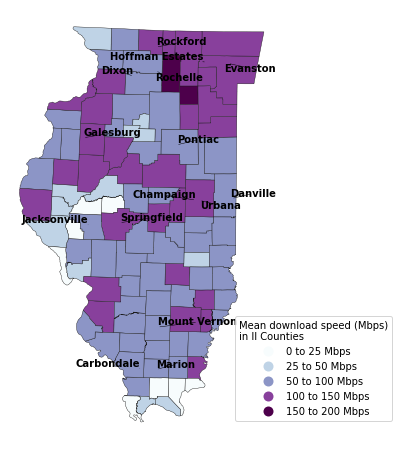

In [48]:
fig, ax = plt.subplots(1, figsize=(20, 8))

county_data.plot(
    column="group", cmap="BuPu", linewidth=0.4, ax=ax, edgecolor="0.1", legend=True
)

ax.axis("off")

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.45, 0.3))
leg.set_title("Mean download speed (Mbps)\nin Il Counties")

texts = []
for x, y, label in zip(il_places.geometry.x, il_places.geometry.y, il_places["NAME"]):
    texts.append(plt.text(x, y, label, fontsize=10, fontweight="bold", ha="left"))

adjust_text(
    texts,
    force_points=0.3,
    force_text=0.8,
    expand_points=(1, 1),
    expand_text=(1, 1),
    arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
)